In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/Registry_Data.csv',index_col='ID')
df.head()

,Sex,Age,Weight,Height,BMI,T2D,HTN,Site,Precondition
ID,,,,,,,,,
1,M,62,65,158,26.037494,0,1,Kolfe W03,NaN
2,F,60,90,169,31.511502,1,1,Kolfe W03,NaN
3,F,70,60,151,26.314635,0,1,Kolfe W03,NaN
4,M,79,79,170,27.335640,0,1,Kolfe W03,NaN
5,F,48,60,148,27.392257,0,1,Kolfe W03,NaN


In [3]:
df.dtypes

Sex              object
Age               int64
Weight            int64
Height            int64
BMI             float64
T2D               int64
HTN               int64
Site             object
Precondition     object
dtype: object

In [4]:
df.shape

(2091, 9)

In [5]:
df.head()

,Sex,Age,Weight,Height,BMI,T2D,HTN,Site,Precondition
ID,,,,,,,,,
1,M,62,65,158,26.037494,0,1,Kolfe W03,NaN
2,F,60,90,169,31.511502,1,1,Kolfe W03,NaN
3,F,70,60,151,26.314635,0,1,Kolfe W03,NaN
4,M,79,79,170,27.335640,0,1,Kolfe W03,NaN
5,F,48,60,148,27.392257,0,1,Kolfe W03,NaN


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2091.0,53.994261,12.310573,22.000000,45.000000,55.000000,63.000000,91.000000
Weight,2091.0,68.462936,12.421464,32.000000,60.000000,68.000000,76.000000,123.000000
Height,2091.0,161.593496,9.188886,75.000000,155.000000,161.000000,168.000000,190.000000
BMI,2091.0,26.274336,4.858091,14.515895,23.140496,25.711008,28.763971,106.666667
T2D,2091.0,0.445720,0.497164,0.000000,0.000000,0.000000,1.000000,1.000000
HTN,2091.0,0.689622,0.462759,0.000000,0.000000,1.000000,1.000000,1.000000


<Figure size 720x480 with 0 Axes>

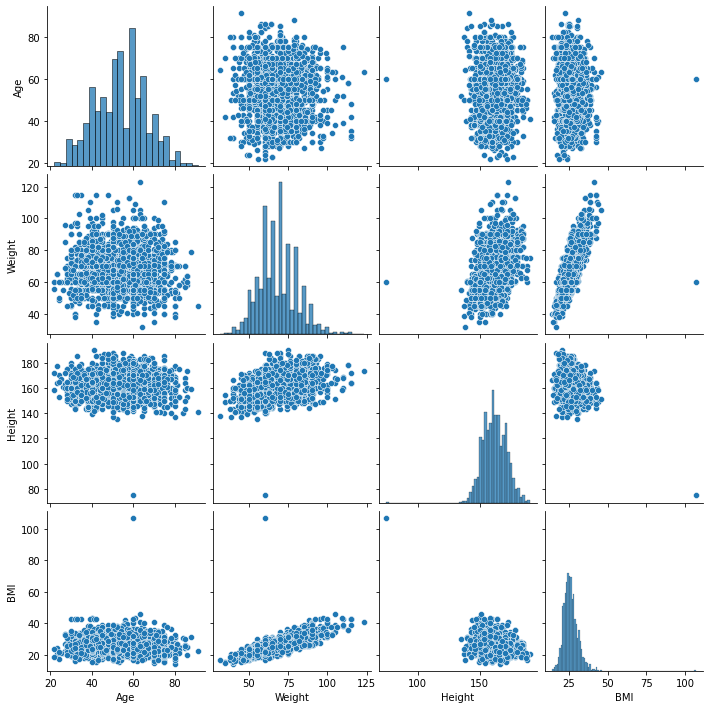

In [7]:
plt.figure(dpi=120)
sns.pairplot(df.drop(columns=['T2D','HTN']))
plt.show()

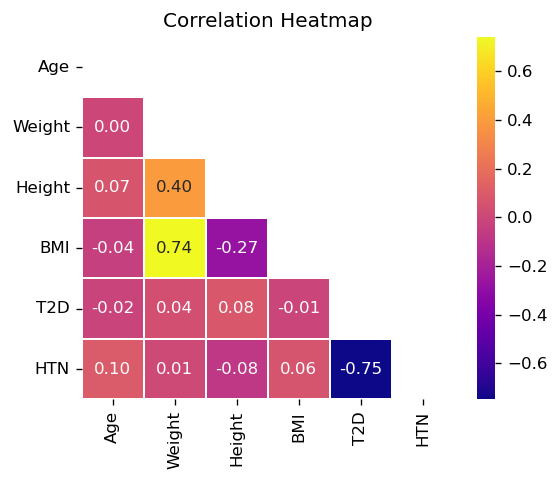

In [8]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
features = [i for i in df.columns if i != 'Outcome']
for cols in df[features]:
      df[cols].plot(kind='box', notch=True, patch_artist=True)
      plt.show()